In [8]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics.pairwise import cosine_similarity

# Create DataFrame
df = pd.read_csv('RoomMatesDataSet.csv')

# Preference data (example)
preference_data = {
    "ID": 2,
    "Name": "Xena Pandey",
    "Age": 35,
    "Gender": "Male",
    "Native Language": "Spanish",
    "Interests": "Sports",
    "Cleanliness Level": 3,
    "Sleeping Level": 5,
    "Smoking": 1,
    "Drinking": 0,
    "Cooking Level": 5,
    "Introvert Level": 5,
    "Extrovert Level": 2,
    "Intrest In Music": 3,
    "Intrest In Dance": 1,
    "Intrest In Physical Activities": 4,
    "Exercise Habits": 5,
    "Intrest in Gaming": 2,
    "IsWorking": 1
  }

# Convert preference data to DataFrame
preference_df = pd.DataFrame([preference_data])

# Preprocessing
categorical_features = ['Gender', 'Native Language', 'Interests']
numeric_features = df.columns.difference(['Name', 'Gender', 'Native Language', 'Interests'])

# Define preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# Fit the preprocessor to the dataset and transform both the dataset and preference data
df_transformed = preprocessor.fit_transform(df)
preference_transformed = preprocessor.transform(preference_df)

# Calculate cosine similarity
similarity_scores = cosine_similarity(df_transformed, preference_transformed)

# Create a DataFrame with names and match percentages
df['Match Percentage'] = similarity_scores * 100

# Display results
print(df[['Name', 'Match Percentage']])


              Name  Match Percentage
0       Jatin Nair        -15.330975
1      Xena Pandey        100.000000
2     Deepak Yadav         38.911930
3    Aakash Chopra         10.266823
4       Tina Gupta         44.760054
..             ...               ...
495           Hari          1.417807
496          Bittu        -36.282897
497           Tina        -35.442545
498          Manoj        -36.488616
499          Leena          4.078598

[500 rows x 2 columns]


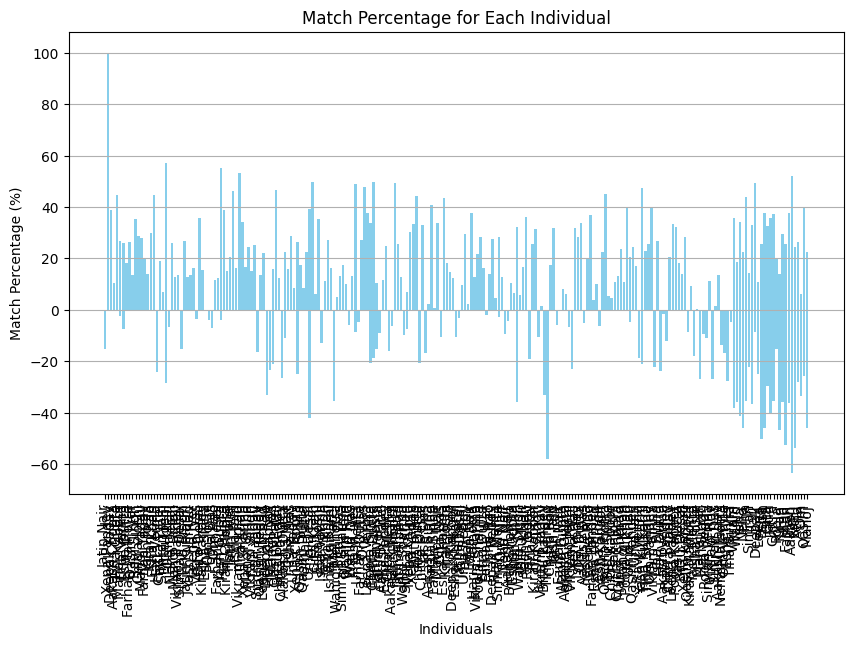

In [17]:
import matplotlib.pyplot as plt

# Bar chart for match percentages
plt.figure(figsize=(10, 6))
plt.bar(df['Name'], df['Match Percentage'], color='skyblue')
plt.title('Match Percentage for Each Individual')
plt.xlabel('Individuals')
plt.ylabel('Match Percentage (%)')
plt.xticks(rotation=90)
plt.grid(axis='y')

# Show plot
plt.show()


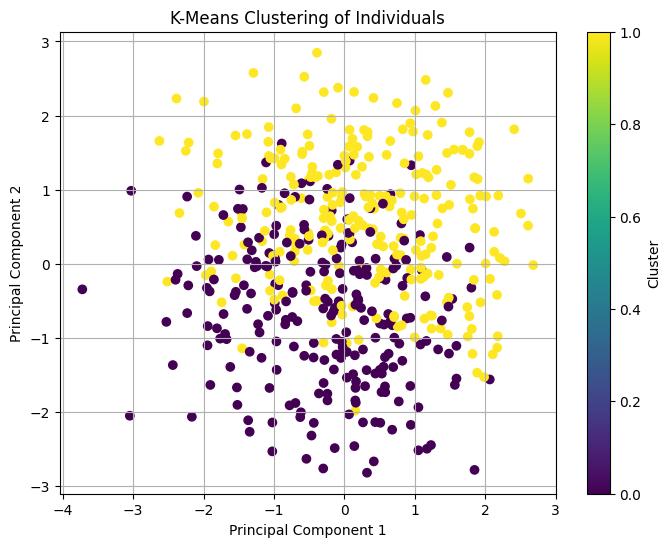

In [18]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Determine the number of clusters (e.g., 2 for simplicity)
num_clusters = 2

# Apply KMeans clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
df['Cluster'] = kmeans.fit_predict(df_transformed)

# Visualize the clusters (if you reduce dimensions)
# For visualization, you might want to use PCA to reduce dimensions
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
reduced_data = pca.fit_transform(df_transformed)

plt.figure(figsize=(8, 6))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=df['Cluster'], cmap='viridis')
plt.title('K-Means Clustering of Individuals')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.grid()

# Show plot
plt.show()


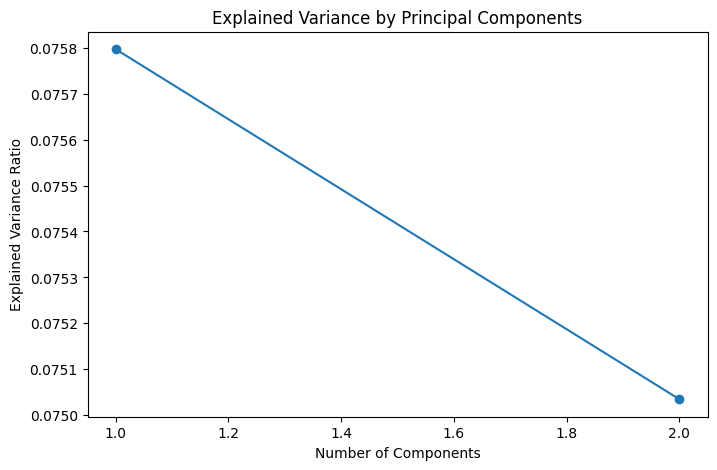

In [19]:
pca.fit(df_transformed)
explained_variance = pca.explained_variance_ratio_

# Plotting explained variance
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o')
plt.title('Explained Variance by Principal Components')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')
plt.show()
